In [1]:
#Hi gang! I make vines. Lol lets go.

import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from random import randint
import random

In [74]:
def vine(top, bot, amp, width, omega, res, data, inval, rand):
    #Paramaters
    interval = inval*res
    
    random.seed(271) #make deterministic
    
    #Leaf param
    size = 0.5
    side1 = 0.25*np.array([1,0])*size
    side2 = 0.125*np.array([3,1])*size
    side3 = 0.5*np.array([1,2])*size
    side4 = 0.5*np.array([-2,-1])*size
    side5 = 0.125*np.array([-1,-3])*size

    #generate vine spine
    spine = []
    for i in np.linspace(bot,top,int(1 + (top-bot)/res)):
        spine.append([amp*np.sin(i * omega)+1, i])

    verts = []

    #Work up the right side, adding leaves as needed
    counter = 0
    for i in spine:
        x = i[0]
        y = i[1]
        if len(data) <= counter:
            counter = 0
        if (i[1]%interval) == 0: 
            if (data[counter] == 3 or data[counter] == 2):
                #Leaf time lets go
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = [x+width/2, y] + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current + side1 + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current + side2 + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current + side3 + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current + side4 + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current + side5 + noise
                verts.append(current)
                verts.append( [x+width/2,y])
            counter += 1
        else:
            verts.append( [x+width/2,y])

    #down
    counter = len(data) - counter
    data = list(reversed(data))
    print(data)
    for i in reversed(spine):
        x = i[0]
        y = i[1]
        if len(data) <= counter:
            counter = 0
        if (i[1]%interval)< 0.5*res:
            if (data[counter] == 3 or data[counter] == 1):
                #LEAF TIME
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = [x+width/2,y] + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current - np.array([1,-1])*side1 + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current - np.array([1,-1])*side2 + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current - np.array([1,-1])*side3 + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current - np.array([1,-1])*side4 + noise
                verts.append(current)
                noise =  list([(random.random()-0.5)*rand, + (random.random()-0.5)*rand])
                noise = np.array(noise)
                current = current - np.array([1,-1])*side5 + noise
                verts.append(current)
                verts.append( [x+width/2,y])
            counter += 1
        else:
            verts.append( [x+width/2,y])

    return verts

[3, 2, 1]


(0.38189064994628513,
 2.2029928231178455,
 1.9806943971816517,
 23.657192058116923)

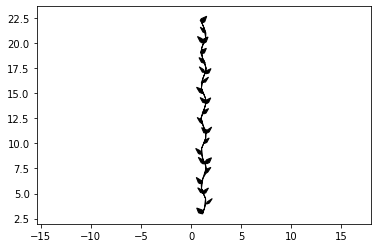

In [75]:
polygon = vine(22,3,0.25,0.5,1.89,0.5,[1,2,3],2, .125)
plt.fill(*zip(*polygon), color = 'black')
plt.axis('equal')